In [5]:
%pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This function will download the dataset using requests

import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

Note: you may need to restart the kernel to use updated packages.


In [7]:
# loading the dataset
filename = "automobileEDA.csv"
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [11]:
#its good to know the kind of data that you are dealing with and choose the corresponding visualization tool
df['peak-rpm'].dtypes

dtype('float64')

In [15]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53653.774094588276)

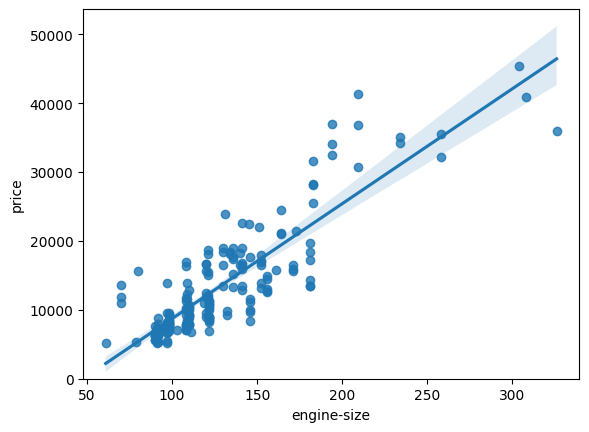

In [17]:
#Continuous Numerical Variables:
# Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.
# In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.
# Let's see several examples of different linear relationships:
# 
# 
# Positive Linear Relationship
# Let's find the scatterplot of "engine-size" and "price"

# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)



In [19]:
df[["engine-size",'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

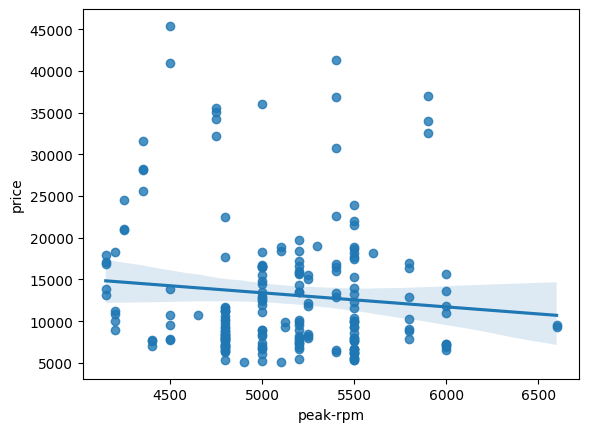

In [21]:
#weak linear relationship
sns.regplot(x="peak-rpm", y="price", data=df)


In [22]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [23]:

#The correlation is 0.0823, the non-diagonal elements of the table.

df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

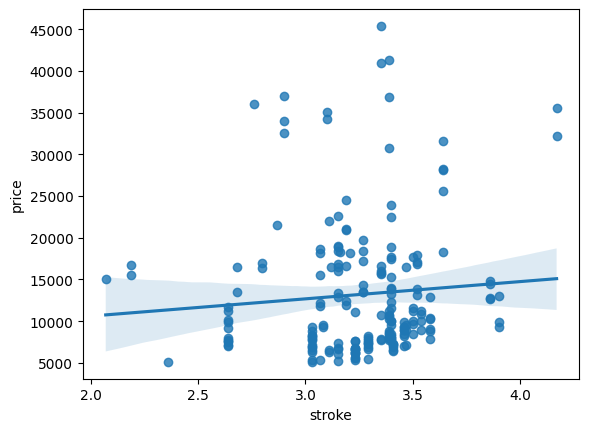

In [24]:

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#Code: 
sns.regplot(x="stroke", y="price", data=df)

In [30]:
#Categorical Variables

#These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

#Let's look at the relationship between "body-style" and "price".
#Categorical Variables

#These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

#Let's look at the relationship between "body-style" and "price".


<Axes: xlabel='body-style', ylabel='price'>

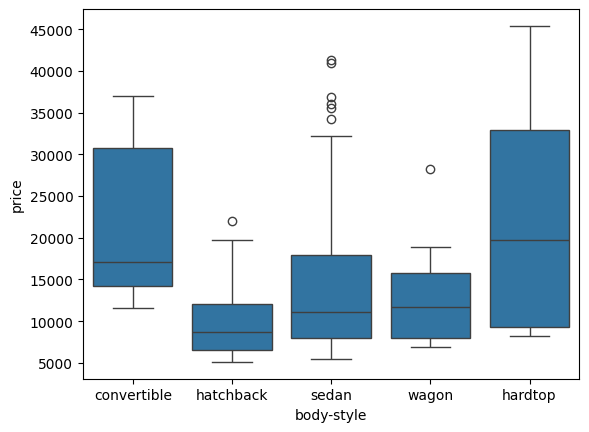

In [26]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

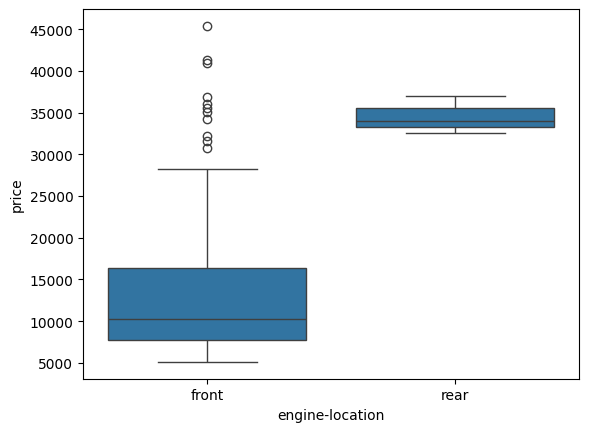

In [27]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

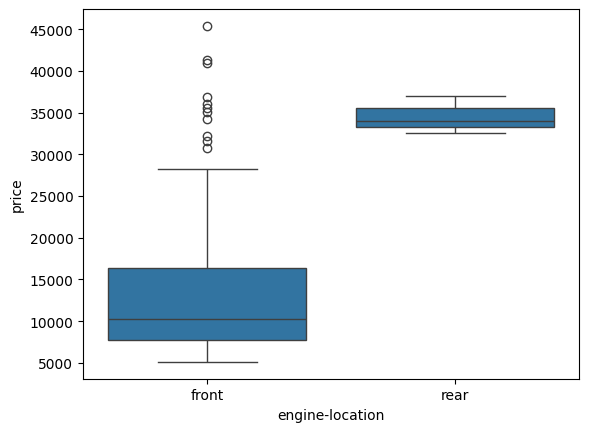

In [29]:
sns.boxplot(x="engine-location", y="price", data=df)

In [33]:
#3. Descriptive Statistical Analysis

#Let's first take a look at the variables by utilizing a description method.

#The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

#This will show:

   # the count of that variable
   # the mean
   # the standard deviation (std)
   # the minimum value
   # the IQR (Interquartile Range: 25%, 50% and 75%)
   # the maximum value

#We can apply the method "describe" as follows:
df.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [34]:
#The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:
df.describe(include=['object'])


,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [35]:
#Value Counts

#Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].
df['drive-wheels'].value_counts()

#We can convert the series to a dataframe as follows:
df['drive-wheels'].value_counts().to_frame()

#Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

#Now let's rename the index to 'drive-wheels':
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

#We can repeat the above process for the variable 'engine-location'.
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

#After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.


,count
engine-location,
front,198
rear,3


In [37]:
#4. Basics of Grouping

#If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

#We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".
df_group_one = df[['drive-wheels', 'price']]

#We can then calculate the average price for each of the different categories of data.
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

#From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

#You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

#This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

#In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

#Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222